# 幅值估计和填零
https://ww2.mathworks.cn/help/signal/ug/amplitude-estimation-and-zero-padding.html

In [4]:
from numpy.fft import fft
import numpy as np
from numpy import ndarray, cos, sin, abs
import matplotlib.pyplot as plt

## 数据的生成

In [5]:
def generate_data():
    # 生成时间序列(0到1之间生成1000个数据点)
    t = np.arange(0, 1, 0.001)
    # 生成信号(broadcast机制)
    data = cos(2 * np.pi * 100 * t) + sin(2 * np.pi * 202.5 * t)
    return data

## 获取信号的幅频

In [6]:
def get_freq_amplitude(input_data: ndarray, N, fs):
    # 对输入信号进行fft变换得到双边频谱
    data_dft = fft(input_data, N)
    # 数据点数
    data_num = len(input_data)
    # 截取一半(此处根据python和matlab检索不同来做一些调整)
    data_dft = data_dft[0:int(N / 2) + 1]
    # 修改一下幅度
    data_dft = data_dft / data_num
    data_dft[1:] = 2 * data_dft[1:]
    # 配置频率横轴(python生成等比序列是不包含结束点的,因此加一个特别小的数)
    freq = np.arange(0.0, fs / 2 + 0.0001, fs / N)
    data_dft = abs(data_dft)
    return data_dft, freq


def plot_signal_freq_amplitude(data_dft, freq):
    fig = plt.figure()
    plt.plot(freq, data_dft)
    plt.xlabel("Hz")
    plt.ylabel("Amplitude")
    plt.show()


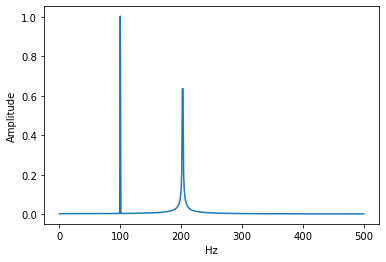

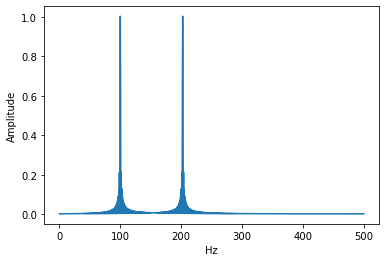

In [7]:
if __name__ == '__main__':
    # 设置采样率
    fs = 1000
    # 构造数据
    data = generate_data()
    # 数据点数
    N = len(data)
    # 获取补零前的幅频以及对应的频率轴
    data_dft, freq = get_freq_amplitude(data, N, fs)
    # 绘制波形
    plot_signal_freq_amplitude(data_dft, freq)
    # 获取补零后的序列的幅频以及对应的频率轴
    data_padding_dft, freq_padding = get_freq_amplitude(data, 2 * N, fs)
    # 绘制波形
    plot_signal_freq_amplitude(data_padding_dft, freq_padding)